# Modeling Notebook
This section focuses on training and evaluating machine learning models using LightGBM. It includes performing hyperparameter tuning with RandomizedSearchCV, visualizing feature importance, analyzing the confusion matrix and ROC curves, and assessing overall model performance.

### Import libraries

In [1]:
from src.model_train import ModelTrainer
from src.model_evaluate import ModelEvaluator
import pandas as pd

### Load data

In [ ]:
df_modelo = pd.read_parquet('~/ifood_case/data/processed/df_model.parquet')

In [7]:
df_modelo.head()

,account_id,offer_id,reward,age,credit_card_limit,gender,time_since_registered,total_orders,average_transaction_value,n_viewed,completion_rate,last_completed_offer_id,offer_completed
0,0020ccbbb6d84e358d3414a3ff76cffd,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,24,60000.0,F,3089,12,12.8375,4,0.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
1,0020ccbbb6d84e358d3414a3ff76cffd,5a8bc65990b245e5a138643cd4eb9837,NaN,24,60000.0,F,3089,12,12.8375,4,0.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
2,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,24,60000.0,F,3089,12,12.8375,4,0.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
3,0020ccbbb6d84e358d3414a3ff76cffd,f19421c1d4aa40978ebb69ca19b0e20d,5.0,24,60000.0,F,3089,12,12.8375,4,0.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
4,004b041fbfe44859945daa2c7f79ee64,3f207df678b143eea3cee63160fa8bed,NaN,55,74000.0,F,2546,6,23.0600,2,1.00,fafdcd668e3743c1bb461111dcafc2a4,0


#### Define columns groups

In [4]:
categorical_cols = ['last_completed_offer_id', 'gender']  
numerical_cols = ['age','credit_card_limit','time_since_registered','total_orders', 'average_transaction_value',
                  'n_viewed','completion_rate']   
target = 'offer_completed'

#### Train model, retrieve best parameters, and make predictions

In [5]:
trainer = ModelTrainer(df_modelo, categorical_cols, numerical_cols, target)
random_search, X_test, y_test = trainer.train()
best_params = trainer.get_best_params(random_search)
best_score = trainer.get_best_score(random_search)    

print("Best parameters:", best_params)
print("Best score:", best_score)

y_pred = trainer.predict(random_search,X_test)
y_pred_proba = trainer.predict_proba(random_search,X_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/home/ester/Documents/Gitlab/Case_ifood/ifood_case/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14902, number of negative: 14549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 29451, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505993 -> initscore=0.023973
[LightGBM] [Info] Start training from score 0.023973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Use **ModelEvaluator** class to display model performance

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      5456
           1       0.74      0.80      0.77      5589

    accuracy                           0.76     11045
   macro avg       0.76      0.76      0.76     11045
weighted avg       0.76      0.76      0.76     11045

The model increased the conversion rate by +4.6% compared to the actual base.


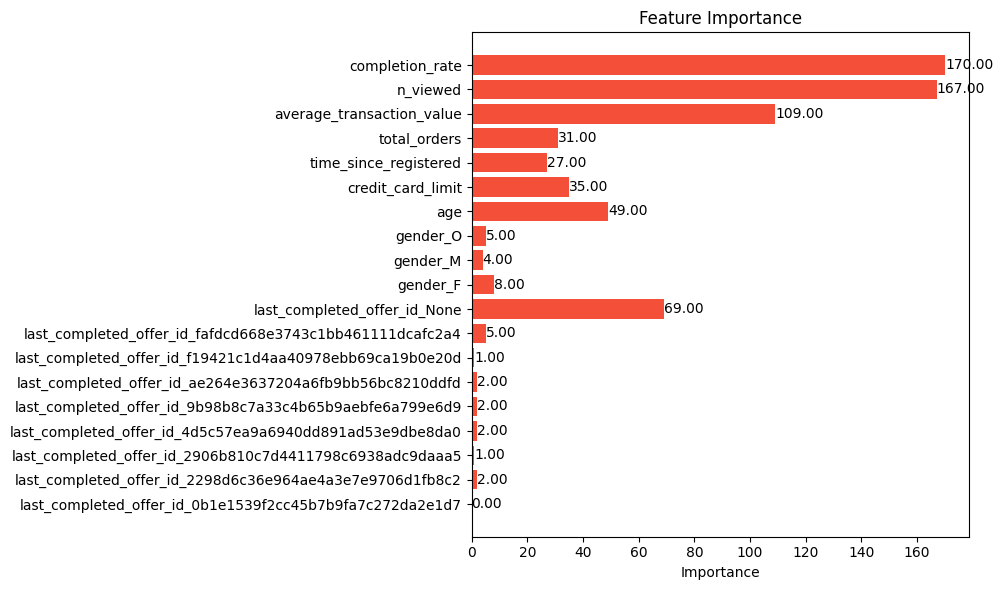

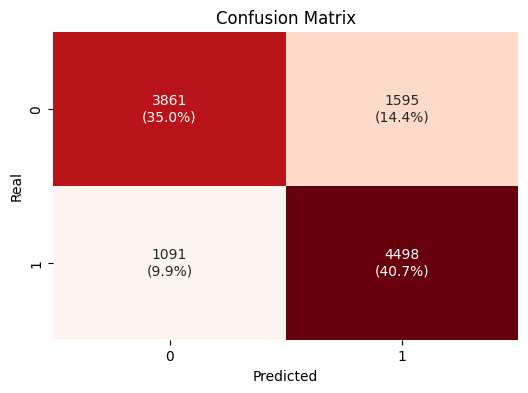

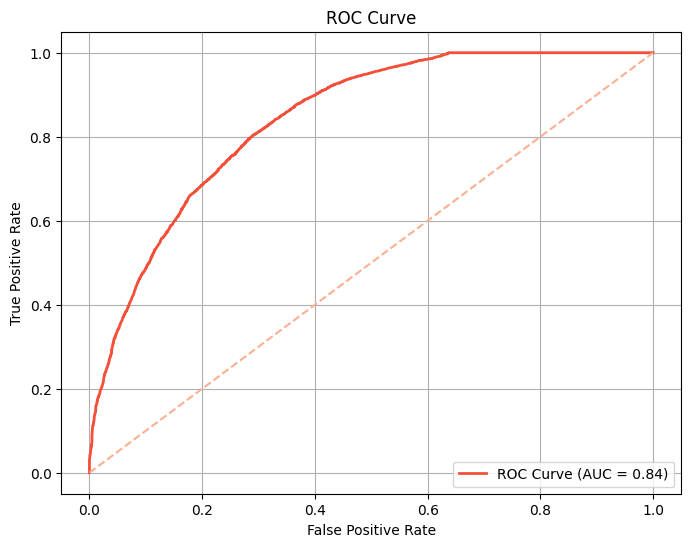

In [6]:
evaluator = ModelEvaluator(y_pred,y_pred_proba,y_test,random_search,categorical_cols,numerical_cols)
evaluator.evaluate()